In [9]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from dataclasses import dataclass
from pydrake.all import (RandomGenerator, Variables, MathematicalProgram,
                         DecomposeAffineExpression, DecomposeAffineExpressions,
                         HPolyhedron, VPolytope)
from large_gcs.contact.contact_location import *
from large_gcs.contact.contact_pair_mode import *
from large_gcs.contact.rigid_body import *
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.graph import Graph

AttributeError: 'ContactLocationFace' object has no attribute 'p_CV'

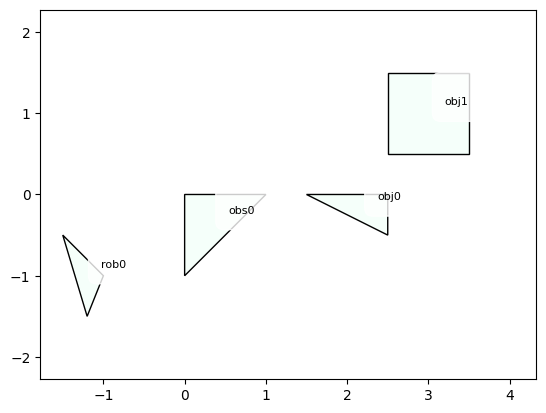

In [18]:


@dataclass
class contact_set(ConvexSet):
    contact_pair_modes: List[ContactPairMode]

obs_vertices = [
    np.array([[0, 0], [1, 0], [0, -1]])
]
obj_vertices = [
    np.array([[0, 0], [1, 0], [1, -0.5]]) + np.array([1.5, 0]),
    np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
]
rob_vertices = [
    np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
]
obs = []
objs = []
robs = []
for i in range(len(obs_vertices)):
    obs.append(RigidBody(name=f"obs{i}", geometry=Polyhedron.from_vertices(obs_vertices[i]),
                mobility_type=MobilityType.STATIC))
for i in range(len(obj_vertices)):
    objs.append(RigidBody(name=f"obj{i}", geometry=Polyhedron.from_vertices(obj_vertices[i]),
                mobility_type=MobilityType.ACTUATED))
for i in range(len(rob_vertices)):
    robs.append(RigidBody(name=f"rob{i}", geometry=Polyhedron.from_vertices(rob_vertices[i]),
                mobility_type=MobilityType.ACTUATED))
all_rigid_bodies = obs + objs + robs
# for rigid_body in all_rigid_bodies:
#     rigid_body.geometry.plot()
# plt.s
temp_sets = [rigid_body.geometry for rigid_body in all_rigid_bodies]
temp_names = [rigid_body.name for rigid_body in all_rigid_bodies]
G = Graph()
G.add_vertices_from_sets(temp_sets,names=temp_names)
G.plot_sets()
G.plot_set_labels()

def generate_contact_sets(static_obstacles: List[RigidBody], unactuated_objects: List[RigidBody], actuated_robots: List[RigidBody]):
    """Generates all possible contact sets given a set of static obstacles, unactuated objects, and actuated robots."""
    body_dict = {body.name: body for body in static_obstacles + unactuated_objects + actuated_robots}
    obs_names = [body.name for body in static_obstacles]
    obj_names = [body.name for body in unactuated_objects]
    rob_names = [body.name for body in actuated_robots]

    # movable = unactuated_objects + actuated_robots
    # static_movable_pairs = list(itertools.product(static_obstacles, movable))
    # movable_pairs = list(itertools.combinations(movable, 2))
    # rigid_body_pairs = static_movable_pairs + movable_pairs
    movable = obj_names + rob_names
    static_movable_pairs = list(itertools.product(obs_names, movable))
    movable_pairs = list(itertools.combinations(movable, 2))
    rigid_body_pairs = static_movable_pairs + movable_pairs

    contact_pair_modes = {
        (body1, body2): generate_contact_pair_modes(body_dict[body1], body_dict[body2]) for body1, body2 in rigid_body_pairs
    }
    print(contact_pair_modes)
    pass

generate_contact_sets(obs, objs, robs)
# contact_pair_modes = generate_contact_pair_modes(obs, obj)
# for contact_pair_mode in contact_pair_modes:
#     contact_pair_mode.plot()